In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
print(os.listdir("C://Users/zahir/LearnSmasher Internship/Task-3"))

['.ipynb_checkpoints', 'Customers_Data.csv', 'Untitled.ipynb']


In [5]:
dataset = pd.read_csv('C://Users/zahir/LearnSmasher Internship/Task-3/Customers_Data.csv')

In [6]:
dataset.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
dataset.shape

(200, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
X= dataset.iloc[:, [3,4]].values

In [18]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set OMP_NUM_THREADS environment variable to suppress memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

# Ignore the warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

wcss = []

In [19]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

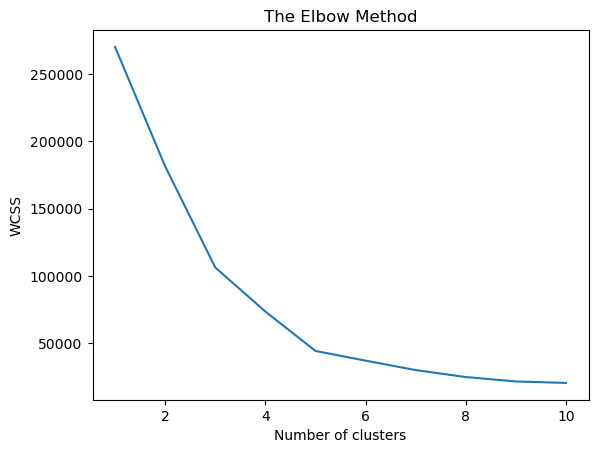

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeansmodel.fit_predict(X)


In [24]:
kmeans.cluster_centers_

array([[ 82.38888889,  90.44444444],
       [ 28.18181818,  33.27272727],
       [ 63.95238095,  46.21428571],
       [ 84.46428571,  15.32142857],
       [ 25.0952381 ,  80.04761905],
       [ 77.78571429,  73.28571429],
       [ 47.86046512,  51.97674419],
       [ 24.58333333,   9.58333333],
       [114.71428571,  78.42857143],
       [124.        ,  17.5       ]])

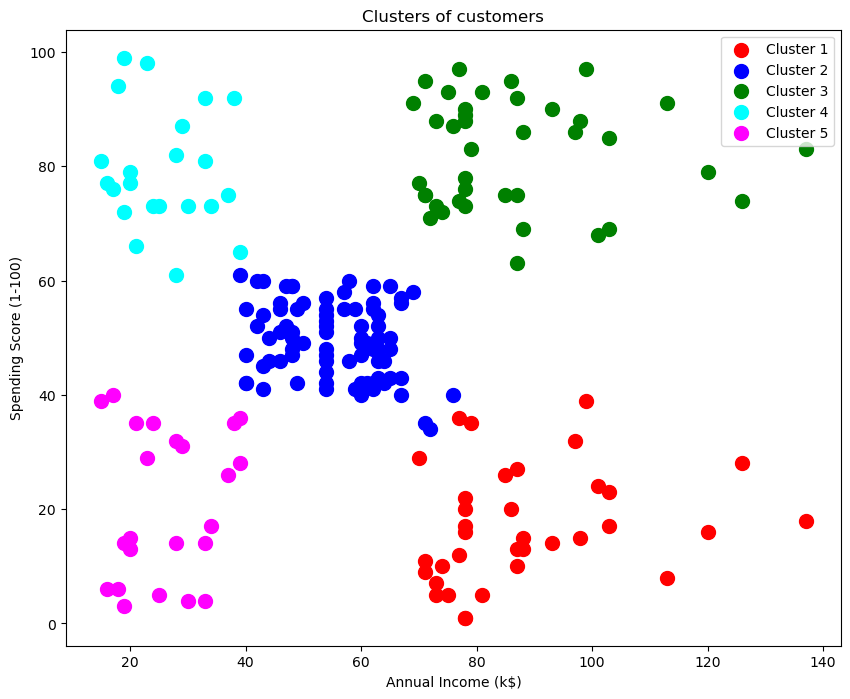

In [25]:
#Visualizing all the clusters 
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Final result by the model
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET] so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less